# Understanding Distributions Through Sampling

This code creates:
* a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot


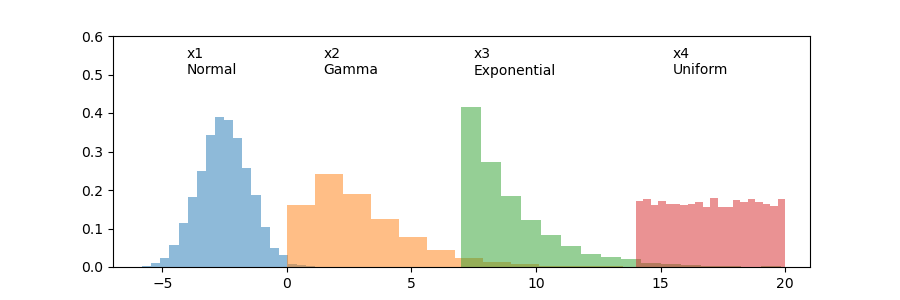

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform');

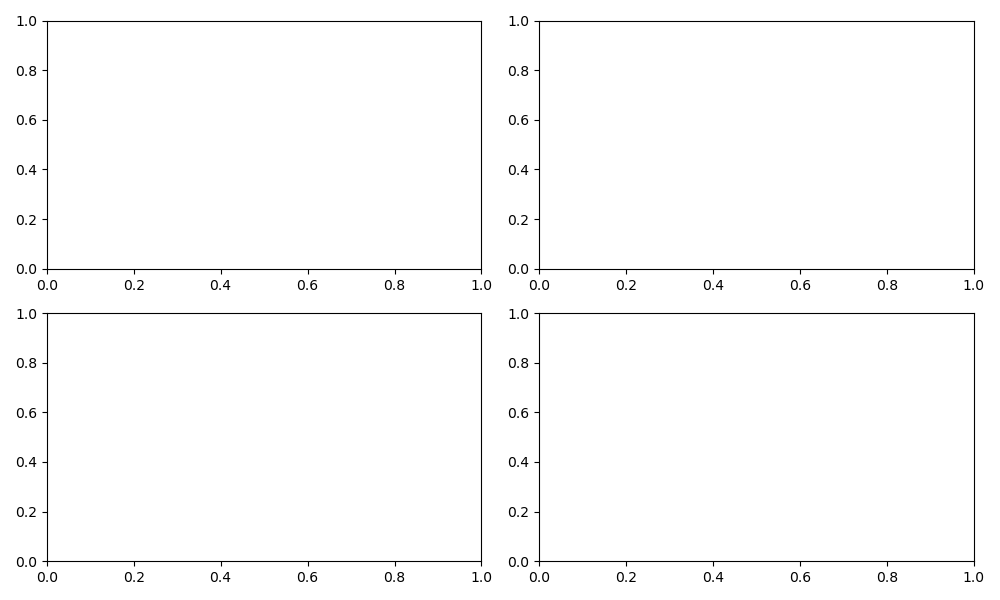

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Dane - 10,000 próbek dla każdego rozkładu
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000) + 7
x4 = np.random.uniform(14, 20, 10000)

data = [x1, x2, x3, x4]
titles = ['x1: Normal', 'x2: Gamma', 'x3: Exponential', 'x4: Uniform']
bins_list = [np.linspace(-7, 2, 20), np.linspace(0, 15, 20), np.linspace(7, 25, 20), np.linspace(14, 20, 20)]

# Inicjalizacja wykresu
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

n_frames = 100  # liczba kroków animacji (do 1000 próbek)
max_samples = 1000

def update(curr):
    if curr == n_frames:
        anim.event_source.stop()
    for i, ax in enumerate(axes):
        ax.cla()
        bins = bins_list[i]
        ax.hist(data[i][:curr * (max_samples // n_frames)], bins=bins, density=True, alpha=0.7, color='C{}'.format(i))
        ax.set_title(titles[i])
        ax.set_xlim(bins[0], bins[-1])
        ax.set_ylim(0, 0.6)
        ax.annotate(f'n = {100+curr * (max_samples // n_frames)}', xy=(0.7, 0.85), xycoords='axes fraction')

# Animacja
anim = animation.FuncAnimation(fig, update, interval=100, frames=n_frames)
plt.tight_layout()
plt.show()


FloatSlider(value=1.0, continuous_update=False, description='Std x1:', max=5.0, min=0.1)

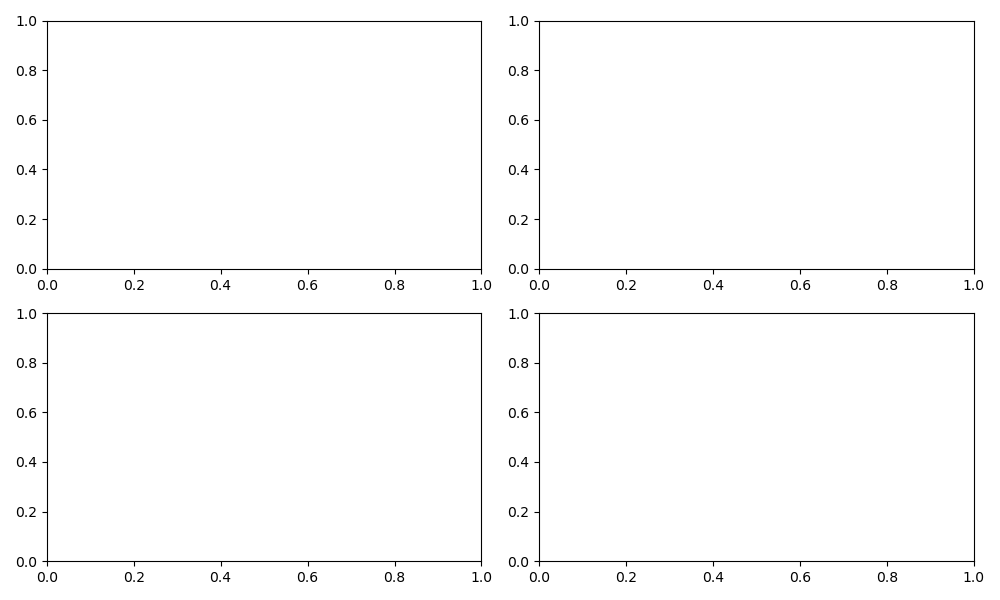

In [2]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ipywidgets as widgets
from IPython.display import display

# Ustawienia początkowe
mean = -2.5
std_slider = widgets.FloatSlider(
    value=1.0,
    min=0.1,
    max=5.0,
    step=0.1,
    description='Std x1:',
    continuous_update=False
)

# Wyświetl slider
display(std_slider)

# Przygotuj dane globalne (reszta rozkładów niezmienna w tym przykładzie)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000) + 7
x4 = np.random.uniform(14, 20, 10000)

data = [None, x2, x3, x4]  # x1 będzie aktualizowane dynamicznie
titles = ['x1: Normal', 'x2: Gamma', 'x3: Exponential', 'x4: Uniform']
bins_list = [np.linspace(-7, 2, 20), np.linspace(0, 15, 20), np.linspace(7, 25, 20), np.linspace(14, 20, 20)]

# Parametry animacji
n_frames = 100
max_samples = 1000

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

def update(curr):
    if curr == n_frames:
        anim.event_source.stop()
    
    # Regeneruj x1 z nowym odchyleniem std
    std = std_slider.value
    x1 = np.random.normal(mean, std, 10000)
    data[0] = x1

    for i, ax in enumerate(axes):
        ax.cla()
        bins = bins_list[i]
        ax.hist(data[i][:curr * (max_samples // n_frames)], bins=bins, density=True,
                alpha=0.7, color='C{}'.format(i))
        ax.set_title(titles[i])
        ax.set_xlim(bins[0], bins[-1])
        ax.set_ylim(0, 0.6)
        ax.annotate(f'n = {curr * (max_samples // n_frames)}', xy=(0.7, 0.85), xycoords='axes fraction')

# Animacja (uwaga: za każdym razem trzeba tworzyć ją na nowo)
def run_animation(change=None):
    global anim
    anim = animation.FuncAnimation(fig, update, interval=100, frames=n_frames)
    plt.tight_layout()
    plt.show()

# Po zmianie wartości slidera, uruchom animację od nowa
std_slider.observe(run_animation, names='value')

# Uruchom animację pierwszy raz
run_animation()
